In [1]:
import numpy as np
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt 

%matplotlib inline 

In [2]:
fs = 15
parent_folder = Path(f'C:\\Users\\YANB0A\\Desktop\\Misc\\Hackthon_data_BYAN')

In [3]:
# Load static data 
df_param = pd.read_csv(Path(parent_folder, 'parameters.csv'))
df_param

,case_num,Kh_Kv,inj_rate,permeability,porosity,prod_bhp,thickness,OIL_VOL
0,0,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632,12019661.29
1,1,96.690954,2216.996775,127.801703,0.265198,672.408364,50.103320,27458593.55
2,2,45.990485,1494.508214,321.702554,0.109952,532.563399,73.410282,18822603.23
3,3,88.322302,2242.513803,427.275505,0.137530,976.777682,37.443929,15558438.71
4,4,27.823837,2994.073285,398.741243,0.220836,465.207942,15.788940,16297670.97
...,...,...,...,...,...,...,...,...
995,995,29.041341,1389.699699,267.802153,0.297613,360.783056,49.659116,30367229.03
996,996,18.726684,1760.642289,107.307413,0.118329,619.945236,50.138466,15391338.71
997,997,79.359722,2888.540632,286.111768,0.220148,463.172938,15.560388,15596070.97
998,998,64.002001,2068.865519,273.422642,0.162465,421.799002,34.314301,16704551.61


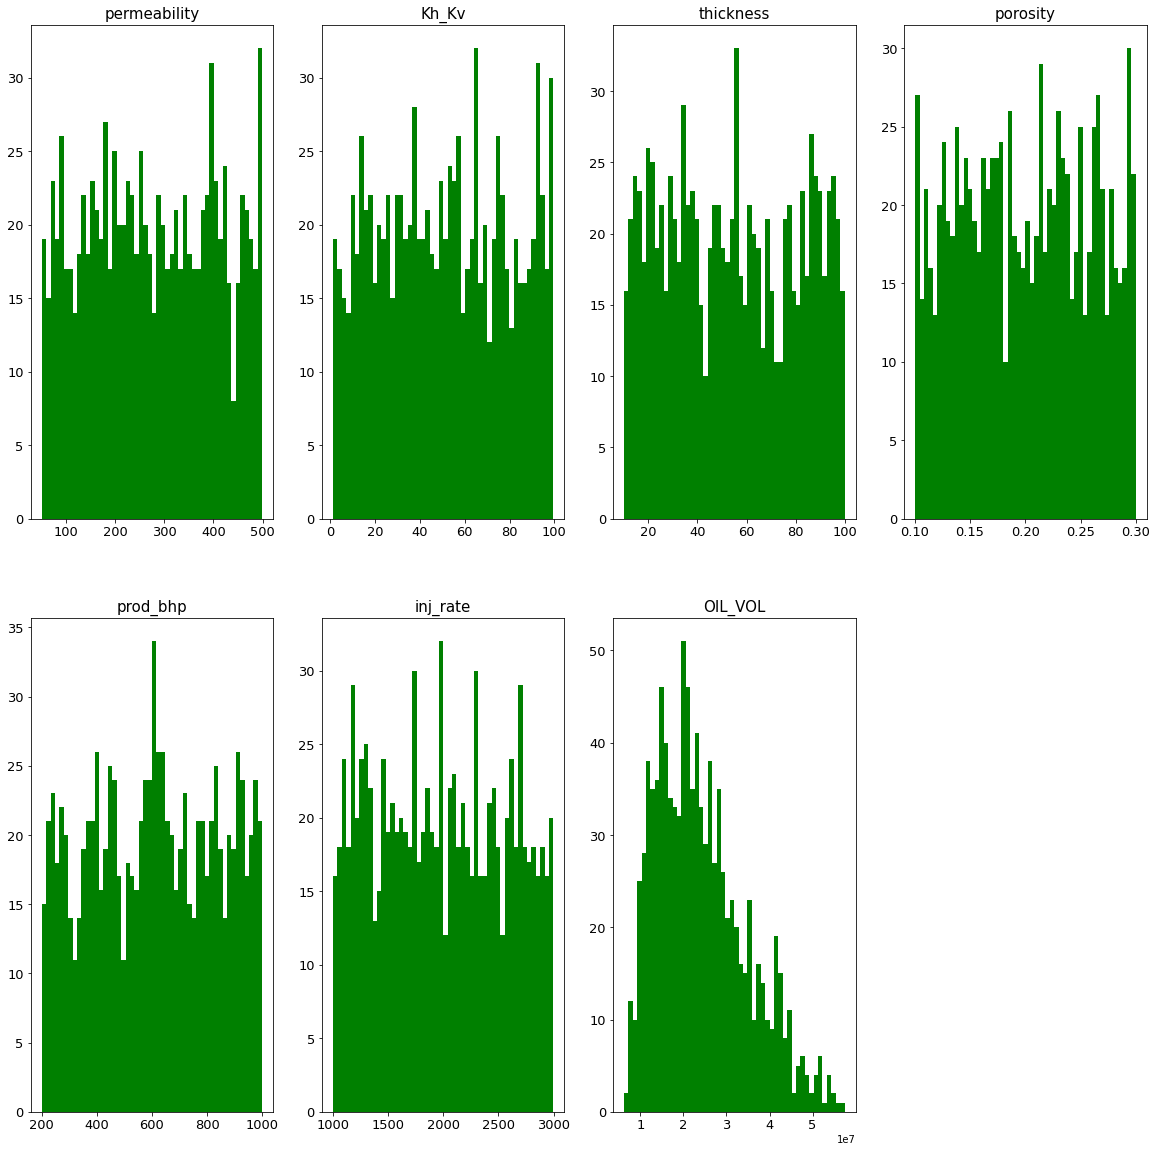

In [4]:
plt.figure(figsize=(20, 20))
selected_cols = ['permeability', 'Kh_Kv', 'thickness', 'porosity', 'prod_bhp', 'inj_rate', 'OIL_VOL']
for i, col in enumerate(selected_cols, 1):
    plt.subplot(2, 4, i)
    plt.hist(df_param[col], bins=50, density=False, color='green')
    plt.title(col, fontsize=fs)
    plt.xticks(fontsize=fs-2)
    plt.yticks(fontsize=fs-2)
plt.savefig('hist.jpg')

In [5]:
df_param.columns[1:]

Index(['Kh_Kv', 'inj_rate', 'permeability', 'porosity', 'prod_bhp',
       'thickness', 'OIL_VOL'],
      dtype='object')

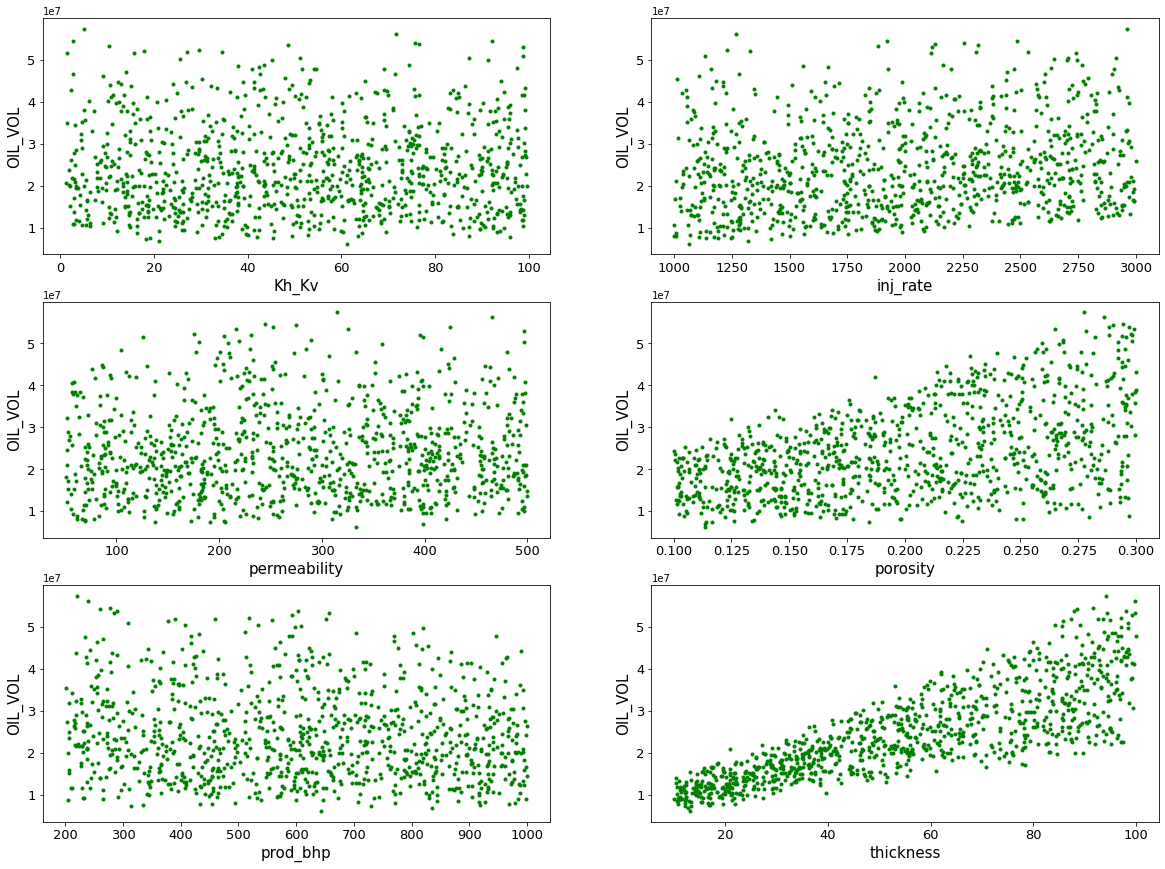

In [6]:
plt.figure(figsize=(20, 20))
i = 1
for row in df_param.columns[1:7]:
    plt.subplot(4, 2, i)
    plt.plot(df_param[row], df_param['OIL_VOL'], 'g.')
    plt.xlabel(row, fontsize=fs)
    plt.ylabel(col, fontsize=fs)
    plt.xticks(fontsize=fs-2)
    plt.yticks(fontsize=fs-2)
    i = i+1
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
X = df_param[['Kh_Kv', 'inj_rate', 'permeability', 'porosity', 'prod_bhp', 'thickness']].values
Y = df_param['OIL_VOL'].values.reshape(-1, 1)
xscaler = MinMaxScaler()
yscaler = MinMaxScaler()
X_scaled = xscaler.fit_transform(X)
Y_scaled = yscaler.fit_transform(Y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.33, random_state=42)

In [10]:
rfr = RandomForestRegressor()
print(rfr)

RandomForestRegressor()


In [11]:
rfr.fit(X_train, y_train)

score = rfr.score(X_test, y_test)
print("R-squared:", score)

<ipython-input-11-4600f82d519e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


R-squared: 0.9746910627037223


([<matplotlib.axis.YTick at 0x256248ab5e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

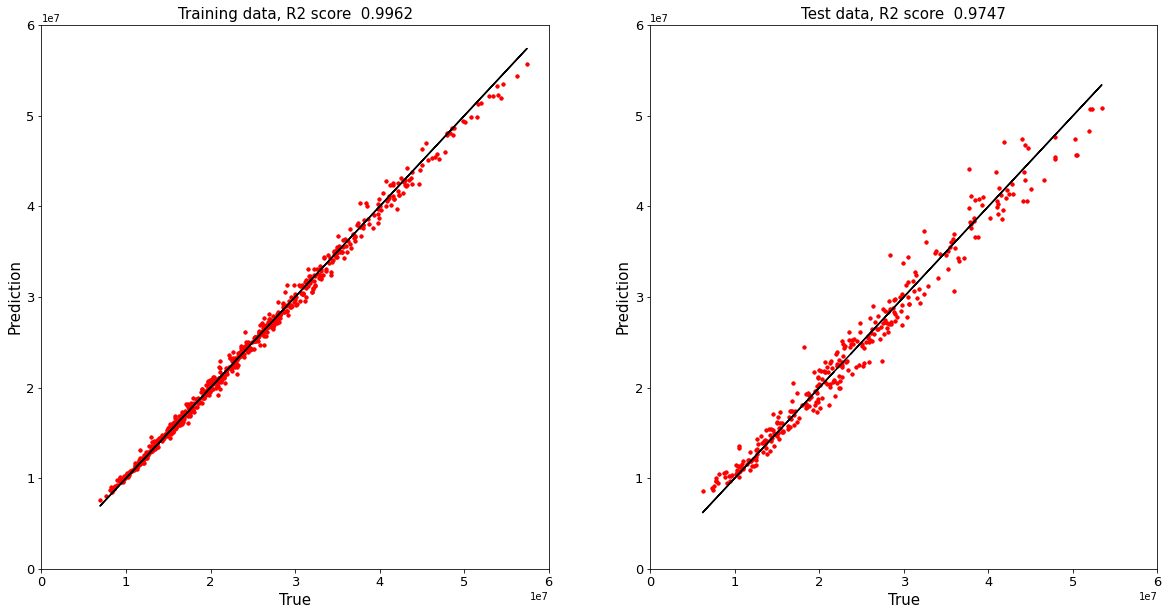

In [12]:
plt.figure(figsize=(20, 10))

y_pred = yscaler.inverse_transform(rfr.predict(X_train).reshape(-1, 1))
y_true = yscaler.inverse_transform(y_train.reshape(-1, 1))
score = r2_score(y_true, y_pred)

plt.subplot(1, 2, 1)
# Parity plot
plt.plot(y_true[:, 0], y_pred[:, 0], 'r.')
plt.plot(y_true[:, 0], y_pred[:, 0], 'r.')
plt.plot(y_true[:, 0], y_true[:, 0], 'k-')
plt.title(f'Training data, R2 score {score: .4}', fontsize=fs)
plt.xlabel('True', fontsize=fs)
plt.ylabel('Prediction', fontsize=fs)
plt.xticks(np.arange(0, 7e7, 1e7), fontsize=fs-2)
plt.yticks(np.arange(0, 7e7, 1e7), fontsize=fs-2)

y_pred = yscaler.inverse_transform(rfr.predict(X_test).reshape(-1, 1))
y_true = yscaler.inverse_transform(y_test.reshape(-1, 1))
score = r2_score(y_true, y_pred)

plt.subplot(1, 2, 2)
# Parity plot
plt.plot(y_true[:, 0], y_pred[:, 0], 'r.')
plt.plot(y_true[:, 0], y_pred[:, 0], 'r.')
plt.plot(y_true[:, 0], y_true[:, 0], 'k-')
plt.title(f'Test data, R2 score {score: .4}', fontsize=fs)
plt.xlabel('True', fontsize=fs)
plt.ylabel('Prediction', fontsize=fs)
plt.xticks(np.arange(0, 7e7, 1e7), fontsize=fs-2)
plt.yticks(np.arange(0, 7e7, 1e7), fontsize=fs-2)